In [3]:
import os
import numpy as np
import pandas as pd
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
!pip install soundfile

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
train_path = '../input/train/train/'
test_path = '../input/test/test/'

In [5]:
filename = 'de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment1.flac'

In [26]:
data, samplerate = sf.read(train_path+filename)

In [27]:
data

array([-2.13623047e-04, -1.52587891e-04, -1.52587891e-04, ...,
        0.00000000e+00, -3.05175781e-05,  0.00000000e+00])

Text(0.5, 0, 'Time [sec]')

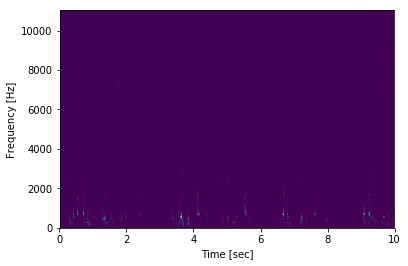

In [28]:
freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
plt.pcolormesh(time, freq, Sxx)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Text(0.5, 0, 'Time [sec]')

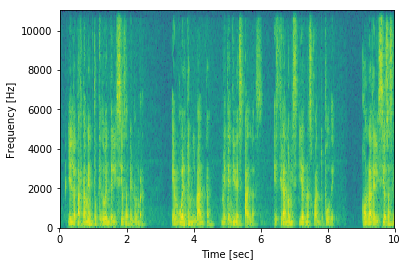

In [29]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
data

In [ ]:
plt.plot(data)

Karena resource pada kaggle kernel tidak cukup, maka hanya digunakan 1000 batch data

In [16]:
label = []
for filename in os.listdir(train_path)[:1000]:
    label.append(filename[:2])

In [17]:
gender = []
for filename in os.listdir(train_path)[:1000]:
    gender.append('male' if filename[3:4]=='m' else 'female')

In [ ]:
for filename in os.listdir(train_path):
    print(filename)

In [18]:
sound_type = []
for filename in os.listdir(train_path)[:1000]:
    sound_type.append('noise' if 'noise' in filename else 'pitch' if 'pitch' in filename else 'speed' if 'speed' in filename else 'notype')

In [19]:
file = []
for filename in os.listdir(train_path)[:1000]:
    file.append(filename)

In [21]:
df = pd.DataFrame(data)

In [22]:
len(df)

1000

In [23]:
series = []
length = []
for filename in os.listdir(train_path)[:1000]:
    flac, samplerate = sf.read(train_path+filename)
    series.append(flac)
    length.append(samplerate)

In [ ]:
data = {'Gender':gender,
        'filename':file,
           'Sound_type': sound_type,
       'languange':label,
       'series': series,
       'length': length}

In [24]:
df = pd.DataFrame(data)

In [25]:
df.head()

,Gender,filename,Sound_type,languange
0,male,es_m_f7d959494477e5e7e33d4666f15311c9.fragment...,noise,es
1,female,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,noise,es
2,female,en_f_31da456c78eb5cf86d2b447e2fbfb736.fragment...,noise,en
3,female,de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment...,noise,de
4,male,es_m_534a0cf6f6aea8e35667a9147d2d0f8d.fragment...,speed,es
